## EDA|FIFA 19

FIFA 19 is a football simulation video game developed by EA Vancouver and released by Electronic Arts on 28 September 2018 for PlayStation 3, PlayStation 4, Xbox 360, Xbox One, Nintendo Switch, and Microsoft Windows.The data set can be found on Kaggle.

![952166.jpg](https://images3.alphacoders.com/952/952166.jpg)

For this analysis we will be using the python pandas library, numpy, seaborn and matplotlib.


## Downloading the Dataset

In [2]:
dataset_url = 'https://www.kaggle.com/winterbreeze/fifa19eda' 

In [3]:
data_dir = '.\fifa19eda'

In [4]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in ".\fifa19eda" (use force=True to force download)


The dataset has been downloaded and extracted.

In [5]:
data_dir = r'.\fifa19eda'

In [6]:
import os
os.listdir(data_dir)

['fifa_eda.csv']

## Data Preparation and Cleaning
- Load the dataset into a data frame using Pandas
- Explore the number of rows & columns, ranges of values etc.
- Handle missing, incorrect and invalid data


In [11]:
import numpy as np
import pandas as pd

In [12]:
fifa19_df=pd.read_csv(data_dir+'/fifa_eda.csv')

In [13]:
fifa19_df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,60.0,1.0,Right,1.0,2.0,CM,2017,2019-01-01,5.750000,134.0,143.0
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60.0,1.0,Right,1.0,2.0,ST,2018,2020-01-01,6.250000,170.0,113.0
18204,241638,B. Worman,16,England,47,67,Cambridge United,60.0,1.0,Right,1.0,2.0,ST,2017,2021-01-01,5.666667,148.0,165.0
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60.0,1.0,Right,1.0,2.0,RW,2018,2019-01-01,5.833333,154.0,143.0


In [14]:
fifa19_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     17955 non-null  float64
 8   Wage                      18207 non-null  float64
 9   Preferred Foot            18207 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Skill Moves               18159 non-null  float64
 12  Position                  18207 non-null  object 
 13  Joined                    18207 non-null  int64  
 14  Contra

In [15]:
fifa19_df.describe(include='all')

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
count,18207.000000,18207,18207.000000,18207,18207.000000,18207.000000,17966,17955.000000,18207.000000,18207,18159.000000,18159.000000,18207,18207.000000,17918,18207.000000,18207.000000,18207.000000
unique,NaN,17194,NaN,164,NaN,NaN,651,NaN,NaN,2,NaN,NaN,27,NaN,35,NaN,NaN,NaN
top,NaN,J. Rodríguez,NaN,England,NaN,NaN,FC Barcelona,NaN,NaN,Right,NaN,NaN,ST,NaN,2019-01-01,NaN,NaN,NaN
freq,NaN,11,NaN,1662,NaN,NaN,33,NaN,NaN,13996,NaN,NaN,2154,NaN,4870,NaN,NaN,NaN
mean,214298.338606,NaN,25.122206,NaN,66.238699,71.307299,NaN,2444.530214,9.731312,NaN,1.113222,2.361308,NaN,2016.420607,NaN,5.946771,165.979129,4585.060971
std,29965.244204,NaN,4.669943,NaN,6.908930,6.136496,NaN,5626.715434,21.999290,NaN,0.394031,0.756164,NaN,2.018194,NaN,0.220514,15.572775,10630.414430
min,16.000000,NaN,16.000000,NaN,46.000000,48.000000,NaN,10.000000,0.000000,NaN,1.000000,1.000000,NaN,1991.000000,NaN,5.083333,110.000000,13.000000
25%,200315.500000,NaN,21.000000,NaN,62.000000,67.000000,NaN,325.000000,1.000000,NaN,1.000000,2.000000,NaN,2016.000000,NaN,5.750000,154.000000,570.000000
50%,221759.000000,NaN,25.000000,NaN,66.000000,71.000000,NaN,700.000000,3.000000,NaN,1.000000,2.000000,NaN,2017.000000,NaN,5.916667,165.000000,1300.000000
75%,236529.500000,NaN,28.000000,NaN,71.000000,75.000000,NaN,2100.000000,9.000000,NaN,1.000000,3.000000,NaN,2018.000000,NaN,6.083333,176.000000,4585.060806


In [16]:
fifa19_df.shape

(18207, 18)

Percentage for Null values and datatype of each column

In [17]:
fifa19_df_dtype=fifa19_df.dtypes
fifa19_df_missing=fifa19_df.isna().mean().round(4)*100

dtls_1=pd.DataFrame(fifa19_df_missing, columns=['missing'])
dtls_2=pd.DataFrame(fifa19_df_dtype, columns=['dtype'])

dtls=pd.concat([dtls_1, dtls_2], axis=1)
dtls.sort_values(by='missing', ascending=False)

,missing,dtype
Contract Valid Until,1.59,object
Value,1.38,float64
Club,1.32,object
International Reputation,0.26,float64
Skill Moves,0.26,float64
ID,0.00,int64
Weight,0.00,float64
Height,0.00,float64
Joined,0.00,int64
Position,0.00,object


In [19]:
#Nominal data so we choose mode
fifa19_df['Club'].fillna(fifa19_df['Club'].mode()[0], inplace=True)
fifa19_df['Contract Valid Until'].fillna(fifa19_df['Contract Valid Until'].mode()[0], inplace=True)

#discrete value imputaion so we go with mode
fifa19_df['International Reputation'].fillna(fifa19_df['International Reputation'].mode()[0], inplace=True)
fifa19_df['Skill Moves'].fillna(fifa19_df['Skill Moves'].mode()[0], inplace=True)

#continuous value imputation so we choose mean
fifa19_df['Value'].fillna(fifa19_df['Value'].mean(), inplace=True)

## Exploratory Analysis and Visualization

- Matplotlib - for visualization (Platting graphas)
- Seaborn - for visualization (Platting beautiful graphas)
- Plotly - for interative plots


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

Let's check players prefered foot


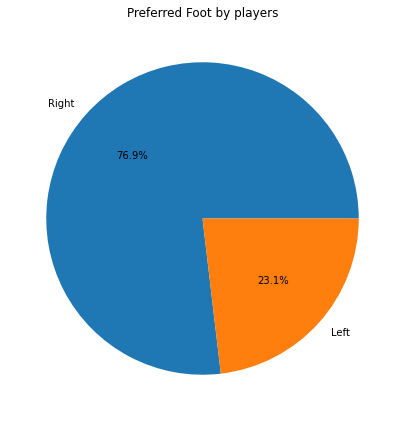

In [22]:
plt.rcParams['figure.figsize']=(7,8)
plt.pie(fifa19_df['Preferred Foot'].value_counts(), labels=['Right','Left'], autopct='%1.1f%%')
plt.title('Preferred Foot by players')
plt.show()

After looking at this chart we can say most of the players are right footed.

### Let's find top five players with good skills moves.

In [23]:
fifa19_df[fifa19_df['Skill Moves']==5][['Name','Nationality','Overall']]\
.sort_values(by='Overall', ascending=False).head(5).style.background_gradient(cmap='viridis')

,Name,Nationality,Overall
1,Cristiano Ronaldo,Portugal,94
2,Neymar Jr,Brazil,92
25,K. Mbappé,France,88
35,Marcelo,Brazil,88
32,Coutinho,Brazil,88


### Now let's check where are most of the players are from.

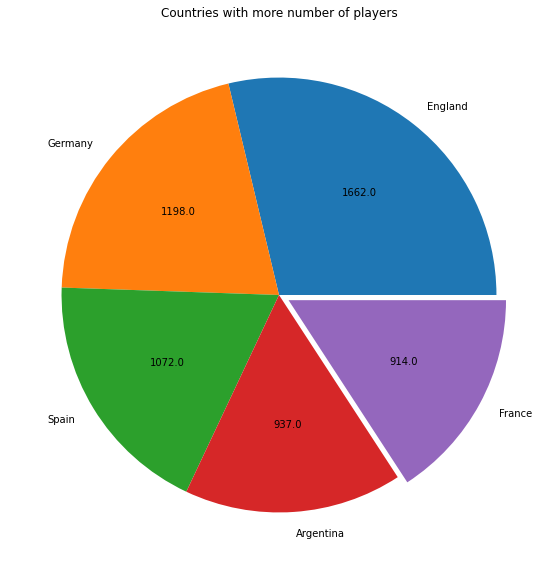

In [24]:
plt.rcParams['figure.figsize']=(10,10)
size=fifa19_df['Nationality'].value_counts().sort_values(ascending=False).head(5)

def absolute_value(val):
    a  = np.round(val/100.*size.sum())
    return a

plt.pie(size, labels=size.index, autopct=absolute_value, explode = [0,0,0,0,0.05])

plt.title('Countries with more number of players')
plt.show()

So, most number of players are from England and least from France.

## Asking and Answering Questions

- Ask at least 5 interesting questions about your dataset
- Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn


## Which club has most number of players?


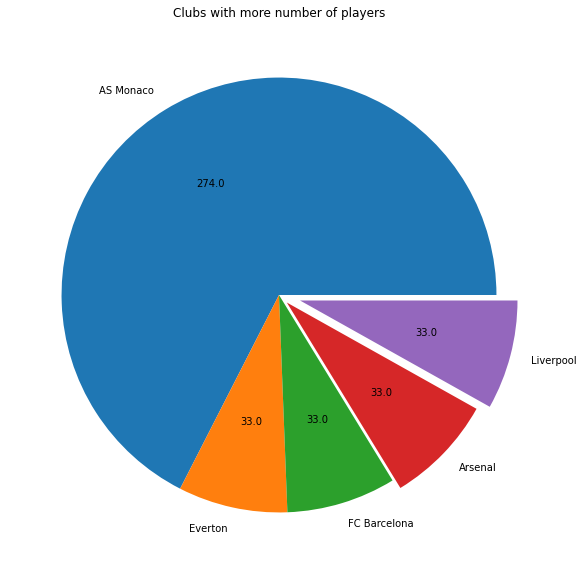

In [29]:
plt.rcParams['figure.figsize']=(10,10)
size=fifa19_df['Club'].value_counts().sort_values(ascending=False).head(5)

def absolute_value(val):
    a  = np.round(val/100.*size.sum())
    return a

plt.pie(size, labels=size.index, autopct=absolute_value, explode = [0,0,0,0.05,0.1])

plt.title('Clubs with more number of players')
plt.show()

Okay,the club is from France with most players,AS Monaco it is.

## Are there any players from India?

In [32]:
def country(x):
    return fifa19_df[fifa19_df['Nationality'] == x][['Name','Overall','Potential','Position']]


country('India')

,Name,Overall,Potential,Position
8605,S. Chhetri,67,67,LS
10011,S. Jhingan,65,71,RCB
12598,J. Lalpekhlua,63,64,RS
12811,G. Singh Sandhu,63,68,GK
13508,A. Edathodika,62,62,LCB
14054,P. Halder,61,67,RCM
14199,P. Kotal,61,66,RB
14218,L. Ralte,61,62,LW
14705,N. Das,60,65,LB
14786,U. Singh,60,67,RM


Yes there are, Thanks EA!

## Can you name top 5 players?

In [38]:
fifa19_df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023,5.916667,154.0,196400.0


## What if we want analysis for any specific club?

In [44]:
#Here's a function for it,we can get details for any other club!

def club(x):
    return fifa19_df[fifa19_df['Club'] == x][['Name','Position','Overall','Nationality','Age','Wage',
                                    'Value','Contract Valid Until']]

club('Real Madrid')

,Name,Position,Overall,Nationality,Age,Wage,Value,Contract Valid Until
6,L. Modrić,RCM,91,Croatia,32,420.0,67000.0,2020
8,Sergio Ramos,RCB,91,Spain,32,380.0,51000.0,2020
11,T. Kroos,LCM,90,Germany,28,355.0,76500.0,2022
19,T. Courtois,GK,89,Belgium,26,240.0,53500.0,2024
27,Casemiro,CDM,88,Brazil,26,285.0,59500.0,2021
30,Isco,LW,88,Spain,26,315.0,73500.0,2022
35,Marcelo,LB,88,Brazil,30,285.0,43000.0,2022
36,G. Bale,ST,88,Wales,28,355.0,60000.0,2022
46,K. Navas,GK,87,Costa Rica,31,195.0,30500.0,2020
62,R. Varane,RCB,86,France,25,210.0,50000.0,2022


Well, it made me sad that Ronaldo is not in the squad

## Display some oldest players

In [46]:
fifa19_df.sort_values('Age', ascending = False)[['Name', 'Age', 'Club', 'Nationality']].head(15).style.background_gradient('viridis')

,Name,Age,Club,Nationality
4741,O. Pérez,45,Pachuca,Mexico
18183,K. Pilkington,44,Cambridge United,England
17726,T. Warner,44,Accrington Stanley,Trinidad & Tobago
10545,S. Narazaki,42,Nagoya Grampus,Japan
7225,C. Muñoz,41,CD Universidad de Concepción,Argentina
1120,J. Villar,41,AS Monaco,Paraguay
12192,H. Sulaimani,41,Ohod Club,Saudi Arabia
15426,M. Tyler,41,Peterborough United,England
4228,B. Nivet,41,ESTAC Troyes,France
10356,F. Kippe,40,Lillestrøm SK,Norway


## Inferences and Conclusion

- It was my first EDA, took me some time making doing it and I had fun doing it, will dive more into analysis!
- Ref: [EDA on FIFA 19 dataset](https://www.kaggle.com/winterbreeze/fifa19eda)